In [1]:
import os 
import sys
import torch
import numpy as np
from scr.lattice import Lattice
from scr.random_walk import RandomWalk
from scr.simulation import Simulation
from scr.hard_spheres import HardSpheres
from scr.utils import make_video,run_hardspheres, run_hardspheres_tp
from tqdm import tqdm 
from matplotlib import pyplot as plt

<stdin>:1:10: fatal error: 'omp.h' file not found
#include <omp.h>
         ^~~~~~~
1 error generated.


[KeOps] Warning : omp.h header is not in the path, disabling OpenMP.
[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


## HARD SPHERES TWO POPULATIONS

In [2]:
simu_name = "plot_hardspheres_twopopulations"
os.mkdir(simu_name)
os.mkdir(simu_name + "/frames")

### Initialize

In [3]:
fig = plt.figure(figsize=(12,6))
subfigs = fig.subfigures(1,2)
t_iter = 0

<Figure size 1200x600 with 0 Axes>

In [4]:
### SLOW PARTICLES ON THE LEFT ###

N = int(200)
L = 10
vel = 0.15*torch.randn(N,2)

R = 0.125 * torch.ones(N) * 1.5
R0 = torch.max(R).item()
pos = torch.tensor([[L/2,L/2]]) + (L/2 - 2*R0)*(torch.rand(N,2) - 0.5)*2
pos[0,0] = L/2
pos[0,1] = L/2

simu1 = HardSpheres(pos,vel,R,L,[1,1],0.001,fig=subfigs[0])
simu1.hs_plot.set(facecolor="tab:orange")

is_good, col_index = simu1.good_config()
resample = torch.ones(N)
while ~is_good:
    resample = resample * (col_index>=0)
    resample[0] = 0.0
    M = resample.sum()
    print(f"not good: " + str(M.item()))
    simu1.pos[resample.bool(),:] = torch.tensor([[L/2,L/2]]) + (L/2 - R0)*(torch.rand(M.int(),2) - 0.5)*2
    is_good, col_index = simu1.good_config()
    
    
### FAST PARTICLES ON THE RIGHT ###

N = int(200)
L = 10
vel = 0.61*torch.randn(N,2)

R = 0.125 * torch.ones(N) * 1.5
R0 = torch.max(R).item()
pos = torch.tensor([[L/2,L/2]]) + (L/2 - 2*R0)*(torch.rand(N,2) - 0.5)*2
pos[0,0] = L/2
pos[0,1] = L/2

simu2 = HardSpheres(pos,vel,R,L,[1,1],0.001,fig=subfigs[1])
simu2.hs_plot.set(facecolor="tab:blue")

is_good, col_index = simu2.good_config()
resample = torch.ones(N)
while ~is_good:
    resample = resample * (col_index>=0)
    resample[0] = 0.0
    M = resample.sum()
    print(f"not good: " + str(M.item()))
    simu2.pos[resample.bool(),:] = torch.tensor([[L/2,L/2]]) + (L/2 - R0)*(torch.rand(M.int(),2) - 0.5)*2
    is_good, col_index = simu2.good_config()

not good: 130.0
not good: 87.0
not good: 57.0
not good: 45.0
not good: 30.0
not good: 17.0
not good: 14.0
not good: 6.0
not good: 5.0
not good: 2.0
not good: 2.0
not good: 2.0
not good: 1.0
not good: 123.0
not good: 65.0
not good: 40.0
not good: 28.0
not good: 19.0
not good: 15.0
not good: 10.0
not good: 7.0
not good: 7.0
not good: 4.0
not good: 3.0
not good: 2.0
not good: 2.0
not good: 2.0
not good: 2.0
not good: 2.0
not good: 2.0
not good: 2.0
not good: 2.0
not good: 1.0


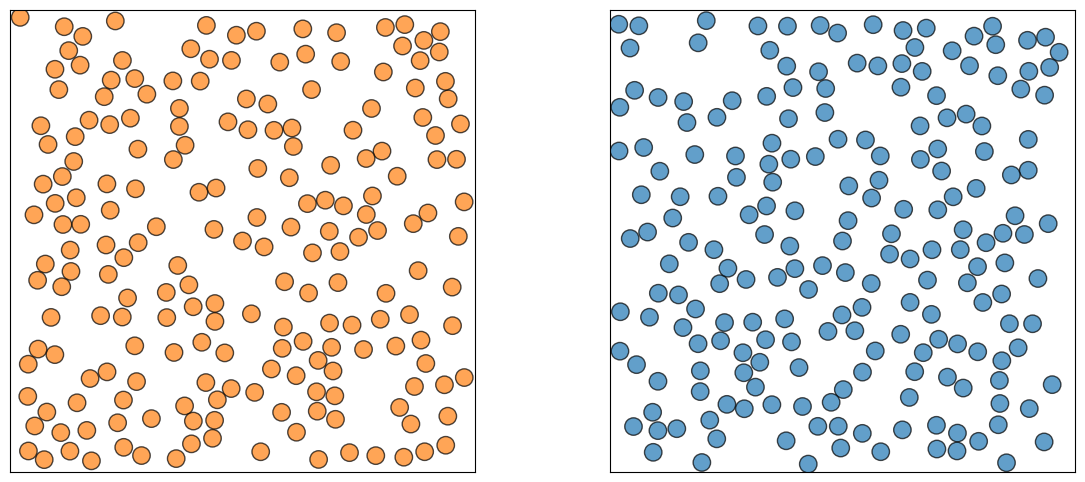

In [5]:
simu1.update_plot()
simu2.update_plot()
fig

### Run the simulation

In [6]:
T = 40.0
plot_every = 0.018 * 4
t_iter, extra = run_hardspheres_tp(simu1,simu2,fig,T,t_iter,plot_every,simu_name)


Progress:100%

### Final step

In [7]:
make_video(simu_name=simu_name,prefix="",video_name=simu_name)